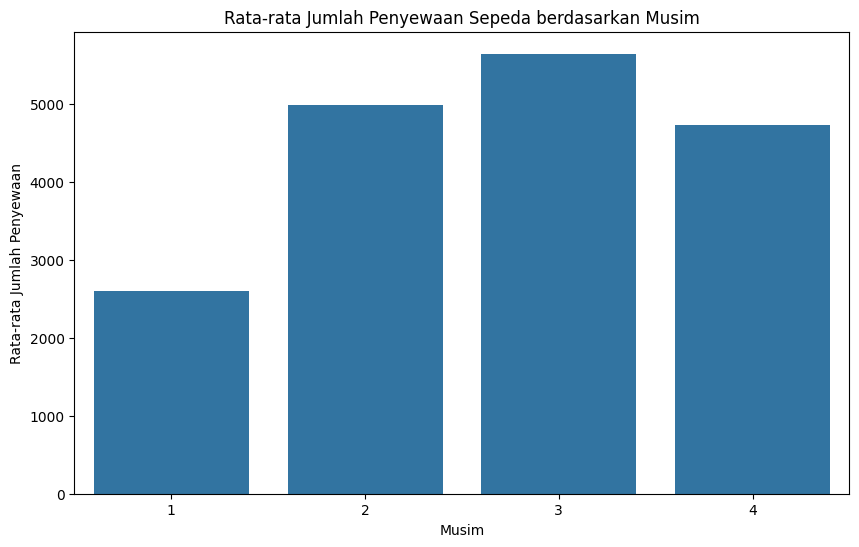

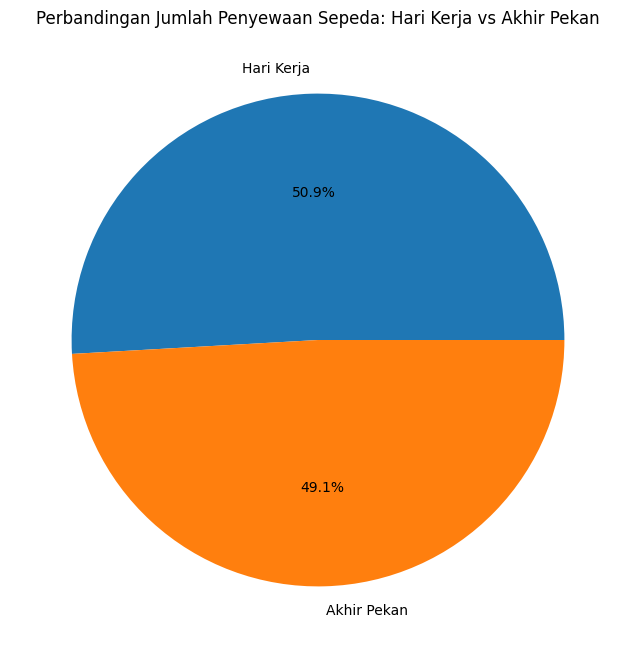

Kesimpulan:
1. Musim yang paling banyak penyewaan sepeda adalah musim 3 dengan rata-rata 5644.30 penyewaan per hari.
2. Perbedaan jumlah penyewaan antara hari kerja dan akhir pekan adalah sekitar 3.54%, dengan hari kerja memiliki jumlah penyewaan yang lebih tinggi.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('data/day.csv')

# Analisis berdasarkan musim
season_rentals = df.groupby('season')['cnt'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=season_rentals)
plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

# Menentukan musim dengan penyewaan tertinggi
musim_tertinggi = season_rentals.loc[season_rentals['cnt'].idxmax(), 'season']
rata_rata_tertinggi = season_rentals['cnt'].max()

# Analisis hari kerja vs akhir pekan
df['is_weekend'] = df['weekday'].isin([0, 6]).astype(int)
weekday_weekend = df.groupby('is_weekend')['cnt'].mean().reset_index()
plt.figure(figsize=(8,8))
plt.pie(weekday_weekend['cnt'], labels=['Hari Kerja', 'Akhir Pekan'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.show()

# Menghitung perbedaan persentase
perbedaan_persentase = abs(weekday_weekend['cnt'].pct_change().iloc[-1]) * 100

print("Kesimpulan:")
print(f"1. Musim yang paling banyak penyewaan sepeda adalah musim {musim_tertinggi} dengan rata-rata {rata_rata_tertinggi:.2f} penyewaan per hari.")
print(f"2. Perbedaan jumlah penyewaan antara hari kerja dan akhir pekan adalah sekitar {perbedaan_persentase:.2f}%, dengan {'hari kerja' if weekday_weekend.iloc[0]['cnt'] > weekday_weekend.iloc[1]['cnt'] else 'akhir pekan'} memiliki jumlah penyewaan yang lebih tinggi.")